Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Varshini Rana"
COLLABORATORS = ""

# Presenting Uncertainty
## School of Information, University of Michigan

## Week 4: Assignment Overview
Version 1.1
### The objectives for this week are for you to:
- recreate the visualization for tracking Donald Trump’s approval ratings throughout his presidency
- create an alternative uncertainty visualization of the same data using principles you learned in class
- analyze and compare the two visualizations

Read the FiveThirtyEight article [How popular/unpopular is Donald Trump](https://projects.fivethirtyeight.com/trump-approval-ratings/). 

The article is based on the datasets [approval_topline.csv](asset/approval_topline.csv) and [approval_poll_list.csv](asset/approval_poll_list.csv). Both of them are in the asset folder.

### Assignment Directions
For part 1 of this assignment, there are three required elements:
- Dots for individual approval/disapproval polls
- Uncertainty bands for the approval and disapproval data
- Line of best estimate (provided in the file)

Interactive elements are not required.

In [2]:
import pandas as pd
import altair as alt
import numpy as np

In [3]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Part 0. Load the data (2 points)

Load the "approval_topline.csv" file into the `topline_df` variable and the "approval_polllist.csv" file into the `polls_df` variable.

In [4]:
# YOUR CODE HERE
# raise NotImplementedError()

topline_df=pd.read_csv("asset/approval_topline.csv")
polls_df=pd.read_csv("asset/approval_poll_list.csv")

In [5]:
assert len(topline_df) == 3537, "Load the data: topline_df does not have the required number of rows"
assert len(topline_df.columns) == 10, "Load the data: topline_df does not have the required number of columns"
assert len(polls_df) == 11556, "Load the data: polls_df does not have the required number of rows"
assert len(polls_df.columns) == 22, "Load the data: polls_df does not have the required number of columns"

## Part 1. Recreate the first visualization for tracking Donald Trump’s approval ratings (10 points)

Note that the original visualization has a dropdown for selecting All Polls, Polls of likely or registered voters, or Polls of Adults. Pick just one of these subsets to visualize. (Hint: filter on the `subgroup` column in the dataset)

In [6]:
# YOUR CODE HERE
# raise NotImplementedError()

# take a subset of Adults polls
subset_adults=topline_df.loc[topline_df.subgroup=="Adults"]
subset_adults_polls=polls_df.loc[polls_df.subgroup=="Adults"]

alt.renderers.set_embed_options(theme="fivethirtyeight")

alt.data_transformers.disable_max_rows()

approval_band=alt.Chart(subset_adults).mark_area(color="#d9f1df").encode(
    x=alt.X("modeldate:T",
            axis=alt.Axis(tickCount=12)),
    y=alt.Y("approve_lo:Q",
            scale=alt.Scale(domain=[20,80], bins=[20,30,40,50,60,70,80]),
            axis=alt.Axis(tickMinStep=10)),
    y2="approve_hi:Q"
)

approval_chart=alt.Chart(subset_adults).mark_line(color="#009f29").encode(
    alt.X("modeldate:T",
          axis=alt.Axis(tickCount=12),
          title=None),
    alt.Y("approve_estimate:Q",
          scale=alt.Scale(domain=[20,80], bins=[20,30,40,50,60,70,80]),
          axis=alt.Axis(tickMinStep=10),
          title=None))

approval_scatter=alt.Chart(subset_adults_polls).mark_circle(color="#009f29", opacity=0.05).encode(
x="createddate:T",
y="approve:Q")

disapproval_band=alt.Chart(subset_adults).mark_area(color="#ffead9").encode(
    x="modeldate:T",
    y="disapprove_lo:Q",
    y2="disapprove_hi:Q"
)

disapproval_chart=alt.Chart(subset_adults).mark_line(color="#ff7400").encode(
    alt.X("modeldate:T",
          axis=alt.Axis(tickCount=12),
          title=None),
    alt.Y("disapprove_estimate:Q",
          scale=alt.Scale(domain=[20,80], bins=[20,30,40,50,60,70,80]),
          axis=alt.Axis(tickMinStep=10),
          title=None))

disapproval_scatter=alt.Chart(subset_adults_polls).mark_circle(color="#ff7400", opacity=0.05).encode(
x="createddate:T",
y="disapprove:Q")

horizontal_line=alt.Chart(pd.DataFrame({'y': [50]})).mark_rule().encode(y='y')

annotations=[["10/25/2018", 70, "% Disapprove"],
            ["10/25/2018", 25, "% Approve"]]
a_df=pd.DataFrame(annotations, columns=["date", "perc", "caption"])

text=alt.Chart(a_df).mark_text(fontSize=20).encode(
alt.X("date:T"),
alt.Y("perc:Q"),
text=alt.Text("caption"))

(approval_band + approval_chart + approval_scatter + disapproval_band + disapproval_chart + disapproval_scatter + horizontal_line + text).configure(
    background="#ffffff").properties(height=400, width=800, title="Donald Trump's approval ratings with subset Adults")

alt.LayerChart(...)

## Part 2. Use one of the techniques from class to create an alternative version of the visualization from Part 1 (15 points) 

Create an alternative uncertainty visualization to your visualization from Part 1. 

**NOTE:** You will either have to make some assumptions in order to construct an alternative visualization, or fit your own model to the data. Document your assumptions in Part 3.

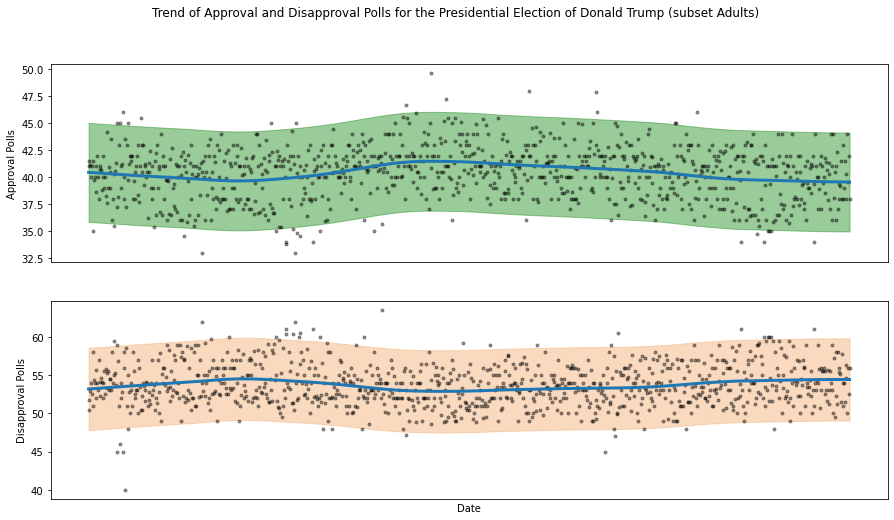

In [7]:
# YOUR CODE HERE
# raise NotImplementedError()

import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother

app=pd.DataFrame(subset_adults_polls.groupby("createddate")["approve"].mean()).reset_index()
dis=pd.DataFrame(subset_adults_polls.groupby("createddate")["disapprove"].mean()).reset_index()

x1 = app["createddate"]
y1 = app["approve"]
x2 = dis["createddate"] 
y2 = dis["disapprove"]

smoother1 = LowessSmoother(smooth_fraction = 0.3, iterations=1)
smoother1.smooth(y1)
smoother2 = LowessSmoother(smooth_fraction = 0.3, iterations=1)
smoother2.smooth(y2)

lower_band1, upper_band1 = smoother1.get_intervals('prediction_interval')
lower_band2, upper_band2 = smoother2.get_intervals('prediction_interval')

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8), sharex=True)
fig.suptitle("Trend of Approval and Disapproval Polls for the Presidential Election of Donald Trump (subset Adults)")

ax1.plot(x1, smoother1.data[0], '.k', alpha=0.4)
ax1.plot(x1, smoother1.smooth_data[0], linewidth=3)
ax1.fill_between(x1, lower_band1[0], upper_band1[0], alpha=0.4, color=["green"])
ax1.set(ylabel="Approval Polls")
ax1.set_xticklabels([])
ax1.set_xticks([])

ax2.plot(x2, smoother2.data[0], '.k', alpha=0.4)
ax2.plot(x2, smoother2.smooth_data[0], linewidth=3)
ax2.fill_between(x2, lower_band2[0], upper_band2[0], alpha=0.4, color=["sandybrown"])
ax2.set(ylabel="Disapproval Polls", xlabel="Date")
ax2.set_xticklabels([])
ax2.set_xticks([])

plt.show()

## Part 3. Assumptions, Justification, and Comparison (5 points)

Document any assumptions you made in Part 2. Then, compare your visualization to the original, justifying your design choices.

Answer:

My visualization in Part 2 uses the LowessSmoother model to smoothen the approval and disapproval poll time-series data. This particular model works by fitting a distinct linear regression model for each individual poll (the data point) by including nearby data points to estimate the slope and intercept of the curve. The weight function gives the most weight to the data points nearest to the point of estimation and the least weight to the data points that are furthest away. One of the assumptions made is that the trend of the data points over time is non-linear, which means that LOWESS would likely yield a better approximation of the trend than linear regression alone, which just yields a straight line. Another assumption is that since LOWESS is a non-parametric model, the data need not follow any specific distribution. There is some uncertainty in the fit obtained by the LowessSmoother model, which is expressed as an uncertainty interval (i.e. the bands on which the scatter points are overlayed). The scatter points outside the bands are deemed to be outliers.

In contrast, the visualization in Part 1 shows complex, undulating, irregular, rough curves in the form of estimates for approval and disapproval polls, along with scatter points of the actual polls, and the corresponding uncertainty bands. While this is quite informative, it is difficult to make out the general trend of the data as the undulations seem to detract from it. On the other hand, the smooth curve along with the uncertainty bands depicting extrapolations in the Part 2 visualization seem to better portray the general trend of the data, which is the rationale for my choice.

Please remember to submit both the HTML and .ipynb formats of your completed notebook. When generating your HTML, be sure to run your complete code first before downloading as HTML. Please remember to work on your explanations and interpretations!